### Drawing the direction field (b)

The code below reproduces the phase plot for our pendulum:
    
$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -kx$$

We add to this an annotation that shows how the system trajectory will evolve from the marked point.

At time $t$ system is at position $x_1$ and velocity $v_1$.

After a short interval at time $t + \Delta t$ the system will move to new position $x_2$ and $v_2$ :

$$x_2= x_1 + \frac{dx}{dt} \Delta t$$

$$v_2= v_1 + \frac{dv}{dt} \Delta t$$

This can be drawn as an arrow on the phase plot, indicating which direction the system trajectory would take from that point.

If we draw a grid of such arrows we form a direction field.

This let's us visualise the system behaviour for any initial starting point and any drawn trajectories should follow the direction field.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# system vector contains variables
# x - position
# v - velocity

# parameter k

def sdot(s,t,k):
    x = s[0]
    v = s[1]

    dx = v
    dv = -k*x
    
    ds = [dx,dv]
    
    return ds




# define initial conditions
x0 = -0.8
v0 = 0
s0 = [x0,v0]

# parameters
# k - force constant - depends on length of pendulum
k = 0.5

t_max = 30.
t_obs = np.linspace(0,t_max, int(t_max*10))
n_obs=len(t_obs)

s_obs = odeint(sdot, s0, t_obs, args=(k,))

x_obs = s_obs[:,0]
v_obs = s_obs[:,1]

(-1.0, 1.0)

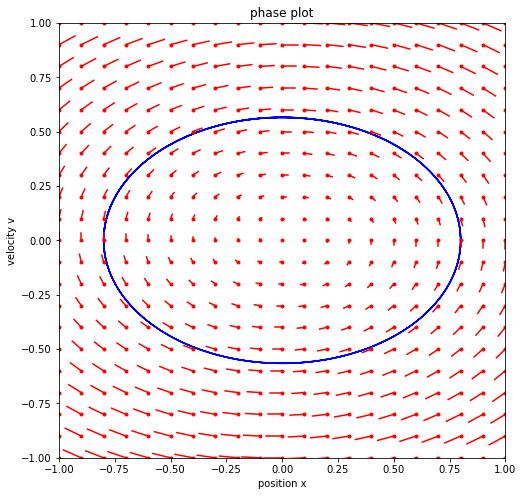

In [3]:
fig = plt.figure(figsize=(8,8))
ax_phase=fig.add_subplot(1,1,1)
ax_phase.set_title('phase plot')
ax_phase.set_xlabel('position x')
ax_phase.set_ylabel('velocity v')
ax_phase.plot(x_obs, v_obs, 'b-')


x_grid = np.linspace(-1,1,21)
v_grid = np.linspace(-1,1,21)

for xi in x_grid:
    for vi in v_grid:
        # use rate equations to find change in x and v over short interal
        change_t = 0.08

        dxdt = vi
        dvdt = -k*xi
        change_x = dxdt*change_t
        change_v = dvdt*change_t 

        # plot this on the phase plot
        # this indicates the direction the system takes
        # from this position
        ax_phase.plot([xi,xi+change_x],[vi,vi+change_v],'r-')

        # indicate starting point
        ax_phase.plot(xi,vi,'r.')

ax_phase.set_xlim(-1,1)
ax_phase.set_ylim(-1,1)

The plot below runs the same code but allows the user to select the initial x and v value:

In [6]:
# phase plot with user controlled start point

from ipywidgets import interactive,FloatSlider

def plot_trajectory(x0,v0):
    
    fig = plt.figure(figsize=(8,8))
    ax_phase=fig.add_subplot(1,1,1)
    ax_phase.set_title('phase plot')
    ax_phase.set_xlabel('position x')
    ax_phase.set_ylabel('velocity v')

    s0 = [x0, v0]
    s_obs = odeint(sdot, s0, t_obs, args=(k,))

    x_obs = s_obs[:,0]
    v_obs = s_obs[:,1]
    
    x_grid = np.linspace(-1,1,21)
    v_grid = np.linspace(-1,1,21)
    
    for xi in x_grid:
        for vi in v_grid:
            # use rate equations to find change in x and v over short interal
            change_t = 0.08
    
            dxdt = vi
            dvdt = -k*xi
            change_x = dxdt*change_t
            change_v = dvdt*change_t 
    
            # plot this on the phase plot
            # this indicates the direction the system takes
            # from this position
            ax_phase.plot([xi,xi+change_x],[vi,vi+change_v],'r-')
    
            # indicate starting point
            ax_phase.plot(xi,vi,'r.')
    ax_phase.plot(x_obs, v_obs, 'b-')
    ax_phase.plot(x0, v0, 'b.', markersize=12)


    ax_phase.set_xlim(-1,1)
    ax_phase.set_ylim(-1,1)
    
    return fig
    
x0_widget = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.5, continuous_update=False)
v0_widget = FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.5, continuous_update=False)

# create the interactive plot, passing a slider that will control each input variable

interactive(plot_trajectory, x0=x0_widget, v0=v0_widget)




interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='x0', max=1.0, min=-1.0, ste…